# Assignment 3

In [ ]:
#Import libraries
import time
import numpy as np
import pandas as pd

#Visualization
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE

# Deep Learning Libraries
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential, load_model, Model
from keras.layers import Dense, Dropout, Flatten, Input, Conv2D, MaxPooling2D
from keras.optimizers import Adam, SGD
from keras.utils import to_categorical


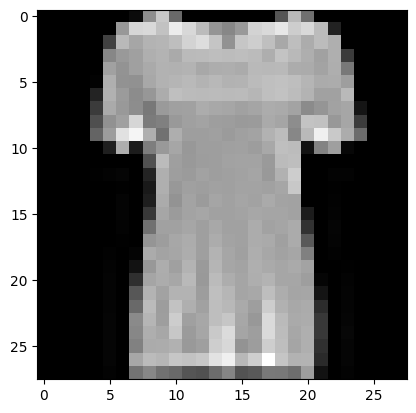

In [ ]:
#Load the train and test sets
x_train = pd.read_csv("x_train.csv")
y_train = pd.read_csv("y_train.csv")

x_test = pd.read_csv("x_test.csv")
y_test = pd.read_csv("y_test.csv")

#Display a sample image
sample_img = x_train.iloc[10,:]
sample_img = np.reshape(sample_img, (28,28,1))
plt.imshow(sample_img, cmap = 'gray')
plt.show()


In [ ]:
# Reshaping for CNN Input: batch, height, width, channel
x_train = x_train.values.reshape((-1, 28, 28, 1))
x_test = x_test.values.reshape((-1, 28, 28, 1))

# Normalize the pixel values to be between 0 and 1
x_train = x_train.astype("float32")/255
x_test = x_test.astype("float32")/255

# One-hot encode the labels
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Classification with Convolutional Neural Networks

### Question 1: Default Network

In [ ]:
# Basic CNN structure
default_cnn = Sequential([Input((28,28,1)),
                          Conv2D(32, kernel_size=(3, 3), strides=1, padding='same', activation='relu'),
                          MaxPooling2D(pool_size=(2, 2)),
                          Conv2D(32, kernel_size=(3, 3), strides=1, padding='same', activation='relu'),
                          Flatten(),
                          Dense(512, activation='relu'),
                          Dense(5, activation='softmax')
                          ])

# Compile the model with Stochastic Gradient Descent (SGD) optimizer
default_cnn.compile(optimizer=SGD(), loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
default_cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 14, 14, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       3,211,776 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │           2,565 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,223,909 (12.30 MB)

 Trainable params: 3,223,909 (12.30 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Record the start time
start_time = time.time()

# Train the model
default_model_history = default_cnn.fit(
    x_train, y_train,
    batch_size=64,
    epochs=10,
    validation_data = (x_test, y_test),
    verbose=1
)

# Record the end time
end_time = time.time()

# Calculate total training time
total_training_time = end_time - start_time
print(f"Total training time: {total_training_time:.2f} seconds")

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8029 - loss: 0.5274 - val_accuracy: 0.9432 - val_loss: 0.1764
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9485 - loss: 0.1598 - val_accuracy: 0.9553 - val_loss: 0.1336
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9616 - loss: 0.1246 - val_accuracy: 0.9603 - val_loss: 0.1198
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9645 - loss: 0.1150 - val_accuracy: 0.9653 - val_loss: 0.1049
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9671 - loss: 0.1043 - val_accuracy: 0.9678 - val_loss: 0.1026
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9702 - loss: 0.0961 - val_accuracy: 0.9669 - val_loss: 0.0995
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9722 - loss: 0.0892 - val_accuracy: 0.9714 - val_loss: 0.0886
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9744 - loss: 0.0832 - val_accuracy: 0.

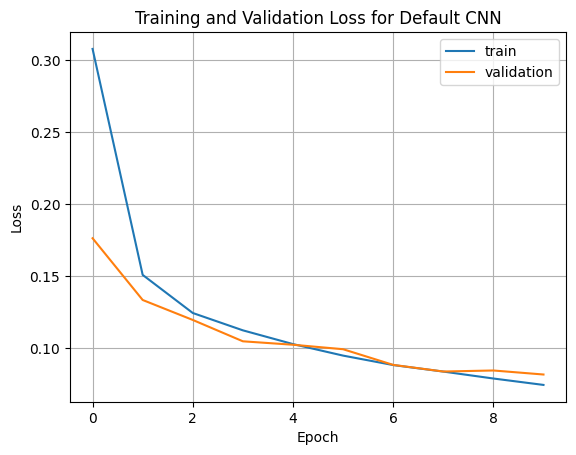

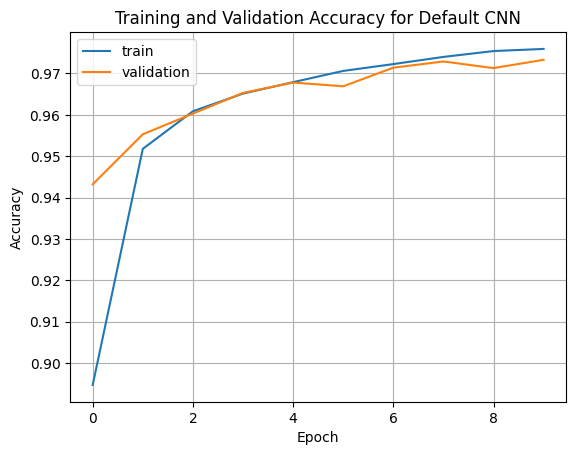

In [ ]:
#Gather history results
default_train_loss = default_model_history.history["loss"]
default_train_acc = default_model_history.history["accuracy"]
default_val_loss = default_model_history.history["val_loss"]
default_val_acc = default_model_history.history["val_accuracy"]

#Plot the training and validation loss over the epochs
plt.title("Training and Validation Loss for Default CNN")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.plot(default_train_loss, label = "train")
plt.plot(default_val_loss, label = "validation")
plt.legend()
plt.grid()
plt.show()

#Plot the training and validation accuracy over the epochs
plt.title("Training and Validation Accuracy for Default CNN")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.plot(default_train_acc, label = "train")
plt.plot(default_val_acc, label = "validation")
plt.legend()
plt.grid()
plt.show()

In [ ]:
# Save the model architecture, weights and optimizer state
default_cnn.save("default_model.keras")

# Load it back:
default_cnn_model = load_model("default_model.keras")
print("The model is loaded!")

The model is loaded!


In [ ]:
# Evaluate and check the test scores
default_cnn_score = default_cnn_model.evaluate(x_test, y_test, verbose=1, return_dict = True)

print('Test loss:', default_cnn_score["loss"])
print('Test accuracy:', default_cnn_score["accuracy"])

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9752 - loss: 0.0807
Test loss: 0.08191539347171783
Test accuracy: 0.9732999801635742


### Question 2: Your Own Network

In [ ]:
# Own CNN model - by Munia
own_model = Sequential([Input((28,28,1)),
                          Conv2D(32, (3, 3), padding='same', activation='relu'),
                          MaxPooling2D((2, 2), strides=(2, 2)),
                          Conv2D(64, (3, 3), padding='same', activation='relu'),
                          MaxPooling2D((2, 2), strides=(2, 2)),
                          Conv2D(128, (3, 3), padding='same', activation='relu'),
                          Conv2D(128, (3, 3), padding='same', activation='relu'),
                          MaxPooling2D((2, 2), strides=(2, 2)),
                          Conv2D(256, (3, 3), padding='same', activation='relu'),
                          Conv2D(256, (3, 3), padding='same', activation='relu'),
                          Conv2D(512, (3, 3), padding='same', activation='relu'),
                          MaxPooling2D((2, 2), strides=(2, 2)),
                          Flatten(),
                          Dense(128, activation='relu'),
                          Dropout(0.5),
                          Dense(64, activation='relu'),
                          Dropout(0.5),
                          Dense(5, activation='softmax')
                          ])

In [ ]:
# Compile the model
own_model.compile(
    optimizer = Adam(learning_rate=0.0001),  # Using a small learning rate
    loss='categorical_crossentropy',  # Using 'sparse_categorical_crossentropy' as labels are integers
    metrics=['accuracy']
)

# Print the model summary
own_model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 14, 14, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 7, 7, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 7, 7, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 3, 3, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 3, 3, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 3, 3, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 3, 3, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 1, 1, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 5)                   │             325 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,379,909 (9.08 MB)

 Trainable params: 2,379,909 (9.08 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Record the start time
start_time = time.time()

# Train the model
own_model_history = own_model.fit(
    x_train, y_train,
    batch_size=128,
    epochs= 10,
    validation_data = (x_test, y_test),
    verbose=1
)

# Record the end time
end_time = time.time()

# Calculate total training time
total_training_time = end_time - start_time
print(f"Total training time: {total_training_time:.2f} seconds")

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 22s 27ms/step - accuracy: 0.6570 - loss: 0.8862 - val_accuracy: 0.9492 - val_loss: 0.1624
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9389 - loss: 0.2216 - val_accuracy: 0.9407 - val_loss: 0.1777
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.9605 - loss: 0.1539 - val_accuracy: 0.9729 - val_loss: 0.0928
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9686 - loss: 0.1216 - val_accuracy: 0.9744 - val_loss: 0.0854
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9743 - loss: 0.0995 - val_accuracy: 0.9763 - val_loss: 0.0822
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9784 - loss: 0.0842 - val_accuracy: 0.9789 - val_loss: 0.0778
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.9802 - loss: 0.0726 - val_accuracy: 0.9810 - val_loss: 0.0664
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9816 - loss: 0.0658 - val_a

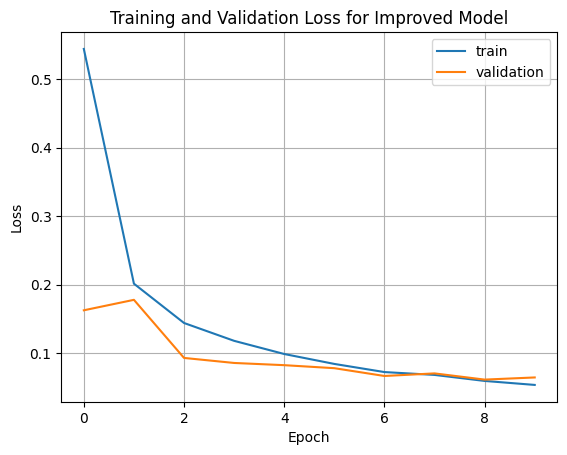

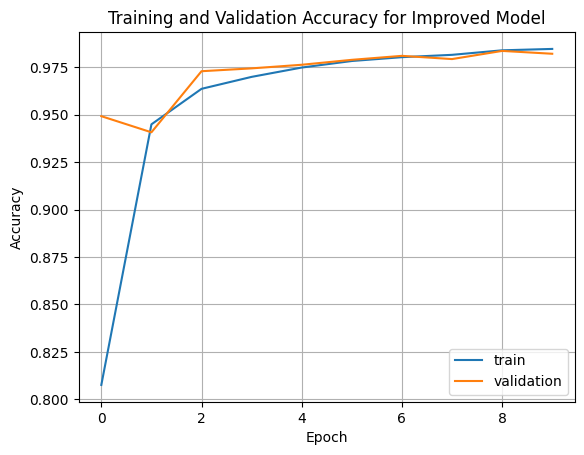

In [ ]:
#Gather history results
own_model_train_loss = own_model_history.history["loss"]
own_model_train_acc = own_model_history.history["accuracy"]
own_model_val_loss = own_model_history.history["val_loss"]
own_model_val_acc = own_model_history.history["val_accuracy"]

#Plot the training and validation loss over the epochs
plt.title("Training and Validation Loss for Improved Model")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.plot(own_model_train_loss, label = "train")
plt.plot(own_model_val_loss, label = "validation")
plt.legend()
plt.grid()
plt.show()

#Plot the training and validation accuracy over the epochs
plt.title("Training and Validation Accuracy for Improved Model")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.plot(own_model_train_acc, label = "train")
plt.plot(own_model_val_acc, label = "validation")
plt.legend()
plt.grid()
plt.show()

In [ ]:
# Save the model architecture, weights and optimizer state
own_model.save("own_model.keras")

In [ ]:
# Load it back:
own_cnn_model = load_model("own_model.keras")
print("The model is loaded!")

# Evaluate and check the test scores
own_cnn_score = own_cnn_model.evaluate(x_test, y_test, verbose=1, return_dict = True)

print('Test loss:', own_cnn_score["loss"])
print('Test accuracy:', own_cnn_score["accuracy"])

The model is loaded!
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9827 - loss: 0.0689
Test loss: 0.06424503773450851
Test accuracy: 0.9821000099182129


### Question 4: Using Your Own Encoding

In [ ]:
print([layer.name for layer in own_cnn_model.layers])  # List all layers

#Define intermediate layer model
intermediate_model = Model(inputs = own_cnn_model.inputs, outputs = own_cnn_model.get_layer('dense_3').output)
intermediate_model.summary()

#Obtain the encoding for the test data
features = intermediate_model.predict(x_test)

['conv2d_2', 'max_pooling2d_1', 'conv2d_3', 'max_pooling2d_2', 'conv2d_4', 'conv2d_5', 'max_pooling2d_3', 'conv2d_6', 'conv2d_7', 'conv2d_8', 'max_pooling2d_4', 'flatten_1', 'dense_2', 'dropout', 'dense_3', 'dropout_1', 'dense_4']


Model: "functional_25"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 14, 14, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 7, 7, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 7, 7, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 3, 3, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 3, 3, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 3, 3, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 3, 3, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 1, 1, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 64)                  │           8,256 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,379,584 (9.08 MB)

 Trainable params: 2,379,584 (9.08 MB)

 Non-trainable params: 0 (0.00 B)

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['input_layer_1']
Received: inputs=Tensor(shape=(32, 28, 28, 1))
  warnings.warn(msg)


300/313 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['input_layer_1']
Received: inputs=Tensor(shape=(None, 28, 28, 1))
  warnings.warn(msg)


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


In [ ]:
print(features.shape)

(10000, 64)


In [ ]:
#Revert labels back to integer values
labels_df = pd.DataFrame(y_test)
labels_original = pd.from_dummies(labels_df)
labels_original = labels_original.to_numpy()

#### Extract and visualize encoding with the first two components from PCA


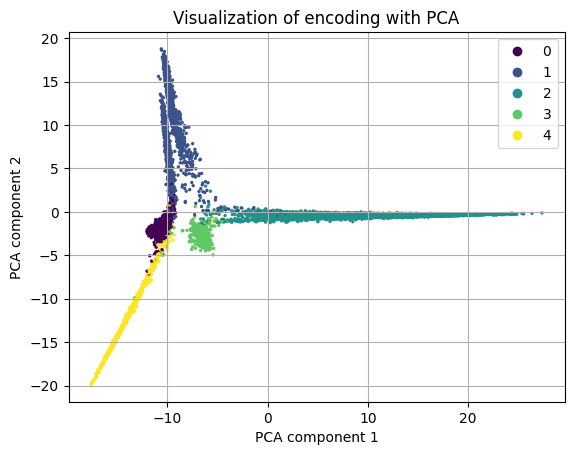

In [ ]:
#Fit and transform PCA to the features (encoding)
pca = PCA(n_components = 2, random_state = 42)
pca_encoding = pca.fit_transform(features)

#Plot the PCA first two components to visualize the encoding
scatter = plt.scatter(pca_encoding[:,0], pca_encoding[:,1], c = labels_original.flatten(), s = 2)
plt.title("Visualization of encoding with PCA")
plt.xlabel("PCA component 1")
plt.ylabel("PCA component 2")
plt.legend(*scatter.legend_elements())
plt.grid()
plt.show()

### Perform clustering with K-Means


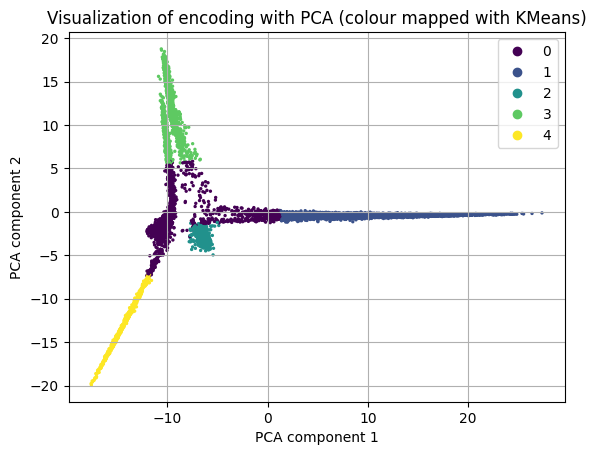

In [ ]:
#Use kmeans to cluster the features
kmeans = KMeans(n_clusters = 5, random_state = 42)
kmeans_transformed_data = kmeans.fit_transform(features)
kmeans_cluster_indices = kmeans.fit_predict(features)

#Using the clusters as colour mappings for the PCA plot above
scatter = plt.scatter(pca_encoding[:,0], pca_encoding[:,1], c = kmeans_cluster_indices, s = 2)
plt.title("Visualization of encoding with PCA (colour mapped with KMeans)")
plt.xlabel("PCA component 1")
plt.ylabel("PCA component 2")
plt.legend(*scatter.legend_elements())
plt.grid()
plt.show()

### Apply t-SNE

In [ ]:
# Apply t-SNE to reduce the features to 2 dimensions
tsne = TSNE(random_state=42)
tsne_features = tsne.fit_transform(features) # this features will be the encoding obtained from one of the layers

# Check the shape of t-SNE features
print(tsne_features.shape)

(10000, 2)


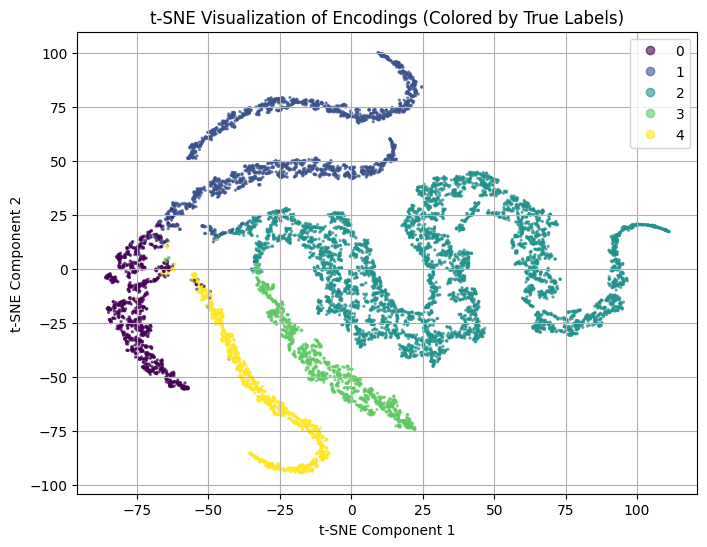

In [ ]:
# Create the scatter plot with t-SNE features
plt.figure(figsize=(8, 6))
scatter = plt.scatter(tsne_features[:, 0], tsne_features[:, 1], c = labels_original.flatten(), cmap='viridis', alpha=0.6, s = 2)

# Add labels and title
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE Visualization of Encodings (Colored by True Labels)')

# Add a colorbar to show the mapping of colors to true labels
#cbar = plt.colorbar(ticks = [0,1,2,3,4])
#cbar.set_label('Class Label')
plt.legend(*scatter.legend_elements())
plt.grid()

# Show the plot
plt.show()

### Guess the labels for the given dataset

Cluster 0:


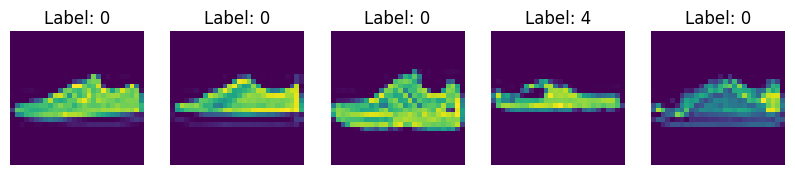

Cluster 1:


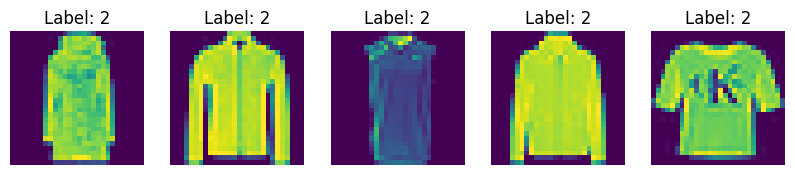

Cluster 2:


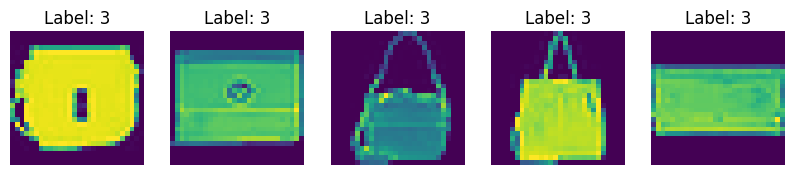

Cluster 3:


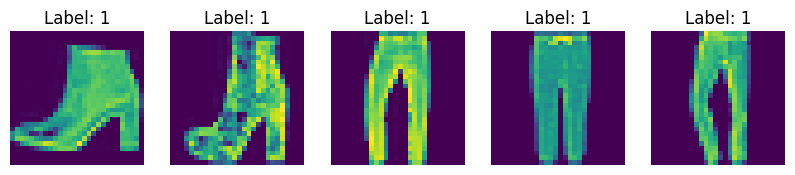

Cluster 4:


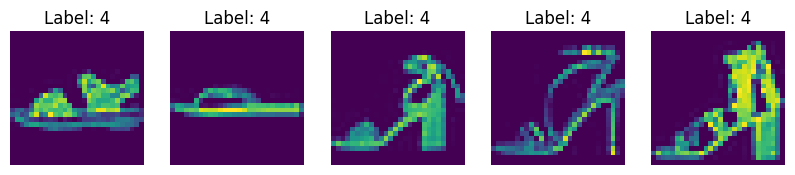

In [ ]:
# Display random samples from each cluster
for cluster in range(5):
    print(f"Cluster {cluster}:")
    cluster_indices = np.where(kmeans_cluster_indices == cluster)[0]
    sample_indices = np.random.choice(cluster_indices, size=5, replace=False)  # Display 5 samples per cluster

    plt.figure(figsize=(10, 2))
    for i, idx in enumerate(sample_indices):
        plt.subplot(1, 5, i + 1)
        plt.imshow(x_test[idx].squeeze())
        #plt.title(f"Label: {y_test[idx]}")
        plt.title(f"Label: {labels_original.flatten()[idx]}")
        plt.axis('off')
    plt.show()